In [151]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

In [129]:
dataset = pd.read_csv(".\dataset\HR_comma_sep.csv")
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [130]:
dataset["Department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [131]:
dataset["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

## Data Preprocessing

In [132]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset["Department"] = encoder.fit_transform(dataset["Department"])
dataset["salary"] = encoder.fit_transform(dataset["salary"])

In [133]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [134]:
X = dataset.drop("left",axis="columns")

In [135]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


In [136]:
y = dataset["left"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

## Dataset split

In [137]:
x_train , x_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [138]:
len(x_train)

11999

In [139]:
len(x_test)

3000

## Training

In [143]:
model = LogisticRegression(max_iter=900)
model.fit(x_train,y_train)

LogisticRegression(max_iter=900)

In [148]:
model.predict([[0.28,0.53,2,157,3,1,0,7,1]])

c:\users\siham\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [144]:
model.score(x_test,y_test)

0.7586666666666667

## Model Evalution

In [152]:
y_predicted = model.predict(x_test)

In [157]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[2116,  178],
       [ 546,  160]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

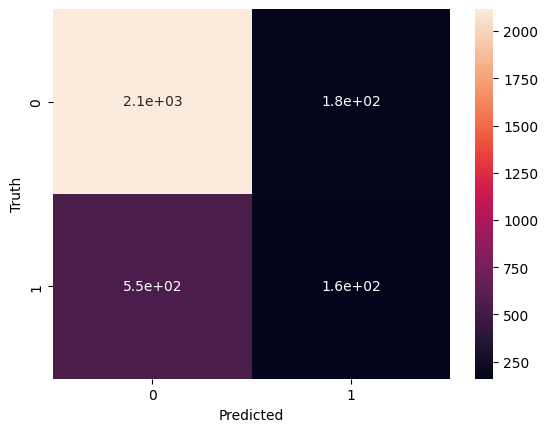

In [156]:
heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')